# NNK Colony Picking Simulations

## Overview:
- Quick and dirty simulation for simulating the number and distribution of mutants selected after picking colonies from a NNK library
- Want to know:
    - How many expected mutants after N colonies
    - How many expected mutants after picking K new having already picked N
    - Distribution of counts across all amino acids
    

In [1]:
#Import helpful packages
import itertools
import math
import numpy as np
import random
from tqdm.notebook import tnrange, tqdm_notebook, tqdm

#Packages for data analysis and plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Need a mapping from codon to AA... but need not actually write out codons
#Instead, just make list of possible outcomes with counts

outcomes = ["M", "I", "T", "T", "K", "N", "S", "R",
            "G", "G", "D", "E", "A", "A", "V", "V",
            "R", "R", "H", "Q", "P", "P", "L", "L",
            "L", "F", "S", "S", "Y", "*", "C", "W"]

In [3]:
def single_trial(n, failure_rate):
    counts = {}
    aas = []
    unique = []
    unique_aas = []
    for col in range(n):
        if random.random() >= failure_rate:
            current_aa = random.choice(outcomes)
            aas.append(current_aa)
            counts[current_aa] = counts.get(current_aa,0)+1
        unique.append(len(counts))
    for key, val in counts.items():
        unique_aas.append(key)
    return [unique, aas, unique_aas]


[ 0.84815  1.65895  2.4253   3.151    3.8439   4.50215  5.1294   5.7353
  6.30985  6.85915  7.37705  7.87745  8.3496   8.8058   9.24005  9.6595
 10.05445 10.4298  10.78945 11.13865 11.4751  11.79945 12.11585 12.40675
 12.69155 12.9694  13.22955 13.48265 13.7259  13.9636  14.19245 14.41075
 14.61945 14.8188  15.0169  15.20105 15.38065 15.556   15.7265  15.89065
 16.0439  16.19255 16.34135 16.48165 16.6142  16.7485  16.87825 16.9999
 17.1203  17.23645 17.34825 17.45435 17.55875 17.65735 17.752   17.84845
 17.9371  18.02585 18.11015 18.1941  18.27445 18.34945 18.4268  18.49915
 18.5733  18.64595 18.71755 18.78175 18.84515 18.908   18.9646  19.02525
 19.08355 19.1387  19.18825 19.23615 19.2864  19.3348  19.38215 19.4266
 19.47465 19.51705 19.5595  19.5977  19.6358  19.67355 19.711   19.74605
 19.77985 19.81355 19.8479  19.879   19.9082  19.9364  19.9674  19.99635
 20.02585 20.0519  20.0776  20.10275 20.1272  20.1512  20.174   20.19825
 20.21895 20.2414  20.25905 20.27785 20.29785 20.31555

<BarContainer object of 120 artists>

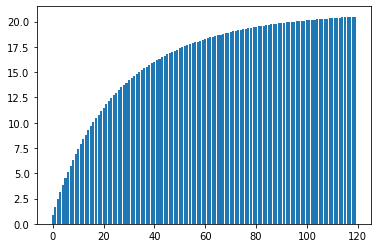

In [4]:
random.seed(42) #the answer to life
total_iters = 20000
num_colonies = 24+96
failure_rate = 0.15

#Initialize lists
uniques = []
aggregate_aas = []
aggregate_unis = []

#Run simulated trials
for iterations in tqdm(range(total_iters), desc='Iterations complete'):
    iter_unique, iter_aas, iter_unis = single_trial(num_colonies, failure_rate)
    uniques.append(iter_unique)
    aggregate_aas=aggregate_aas+iter_aas
    aggregate_unis=aggregate_unis+iter_unis
    
uniques = np.array(uniques)
print(np.mean(uniques, 0))

expected_per_trial = np.mean(uniques, 0)
plt.bar(np.arange(len(expected_per_trial)), expected_per_trial)

Text(0, 0.5, 'Expected # of unique AAs at given position')

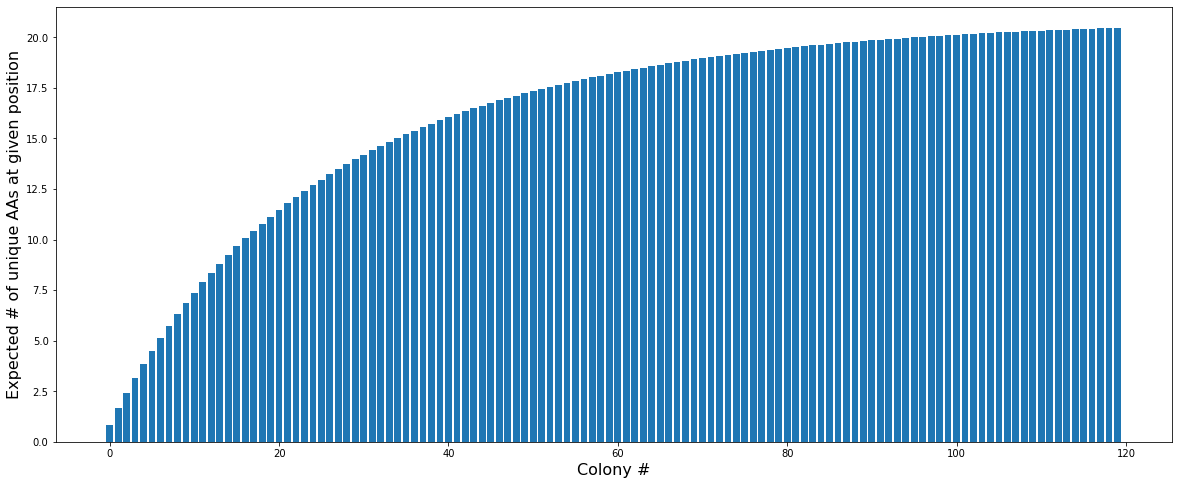

In [5]:
#Slightly bigger plot:
plt.figure(figsize=(20, 8)) 
plt.bar(np.arange(len(expected_per_trial)), expected_per_trial)
plt.xlabel("Colony #", fontsize=16)  
plt.ylabel("Expected # of unique AAs at given position", fontsize=16)

## Frequency breakdown

AAs with 3 codons: L, R, S

AAs with 2 codons: A, G, P, T, V

AAs with 1 codon: C, D, E, F, H, I, K, M, N, Q, W, Y, *, 

In [6]:
#Count of final total aa frequencies
#Sanity check, should match frequency distribution

final_count = {}
for aa in aggregate_aas:
    final_count[aa]=final_count.get(aa,0)+1
    
print(final_count)

for key, val in final_count.items():
    print(f"{key} Frequency: {val/(num_colonies*total_iters)}")

{'I': 63874, 'V': 127268, 'S': 191086, 'N': 63762, 'T': 128103, 'R': 191284, 'M': 63865, 'D': 63814, 'P': 127270, 'A': 126957, 'L': 191197, '*': 63697, 'K': 64038, 'H': 63685, 'F': 64272, 'W': 63440, 'G': 127389, 'E': 63632, 'Q': 63668, 'Y': 63469, 'C': 63383}
I Frequency: 0.026614166666666668
V Frequency: 0.05302833333333333
S Frequency: 0.07961916666666667
N Frequency: 0.0265675
T Frequency: 0.05337625
R Frequency: 0.07970166666666667
M Frequency: 0.026610416666666668
D Frequency: 0.026589166666666667
P Frequency: 0.05302916666666667
A Frequency: 0.05289875
L Frequency: 0.07966541666666667
* Frequency: 0.026540416666666667
K Frequency: 0.0266825
H Frequency: 0.026535416666666665
F Frequency: 0.02678
W Frequency: 0.026433333333333333
G Frequency: 0.05307875
E Frequency: 0.026513333333333333
Q Frequency: 0.026528333333333334
Y Frequency: 0.026445416666666666
C Frequency: 0.026409583333333334


In [7]:
#Run again for only 24 and print out expected of each aa after 24
random.seed(21) #half of the answer to life
total_iters = 20000
num_colonies = 24
failure_rate = 0.15

uniques = []
aggregate_aas = []
aggregate_unis = []

for iterations in tqdm(range(total_iters), desc='Iterations complete'):
    iter_unique, iter_aas, iter_unis = single_trial(num_colonies, failure_rate)
    uniques.append(iter_unique)
    aggregate_aas=aggregate_aas+iter_aas
    aggregate_unis=aggregate_unis+iter_unis
    
final_uni_count = {}
for aa in aggregate_unis:
    final_uni_count[aa]=final_uni_count.get(aa,0)+1
    
print(final_uni_count)

for key, val in final_uni_count.items():
    print(f"Expected {key} Frequency: {val/(num_colonies*total_iters)*24}")


{'S': 17247, 'C': 9524, 'E': 9428, 'V': 14596, 'M': 9478, 'T': 14599, 'W': 9457, 'L': 17210, 'N': 9588, '*': 9447, 'P': 14557, 'G': 14577, 'K': 9457, 'Y': 9600, 'R': 17228, 'D': 9573, 'Q': 9540, 'I': 9553, 'F': 9510, 'H': 9687, 'A': 14694}
Expected S Frequency: 0.86235
Expected C Frequency: 0.4762
Expected E Frequency: 0.47140000000000004
Expected V Frequency: 0.7298
Expected M Frequency: 0.4739
Expected T Frequency: 0.72995
Expected W Frequency: 0.47285
Expected L Frequency: 0.8605
Expected N Frequency: 0.4794
Expected * Frequency: 0.47235000000000005
Expected P Frequency: 0.72785
Expected G Frequency: 0.72885
Expected K Frequency: 0.47285
Expected Y Frequency: 0.48
Expected R Frequency: 0.8614
Expected D Frequency: 0.47865
Expected Q Frequency: 0.477
Expected I Frequency: 0.47765
Expected F Frequency: 0.47550000000000003
Expected H Frequency: 0.48435000000000006
Expected A Frequency: 0.7347
